<a href="https://colab.research.google.com/github/Debapriya2892/Test_repo/blob/main/PRICE_PREDICTION_OF_USED_CAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**
*PREDICTION OF PRICE OF A USED CAR BASED ON GIVEN FEATURES LIKE KMS DRIVEN, CAR TYPE ETC.* 

In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/car_data.csv")

In [40]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [7]:
np.unique(df['Seller_Type'])

array(['Dealer', 'Individual'], dtype=object)

In [9]:
np.unique(df['Transmission'])

array(['Automatic', 'Manual'], dtype=object)

In [10]:
np.unique(df['Owner'])

array([0, 1, 3])

In [12]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [13]:
# Checking for Missing values or Null values
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [17]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [41]:
dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [42]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [43]:
dataset['Current year']= 2022
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [44]:
dataset['No.of Years']= dataset['Current year'] - dataset['Year']
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current year,No.of Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [45]:
dataset.drop(['Year'], axis=1, inplace=True)
dataset.drop(['Current year'], axis=1, inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No.of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [46]:
dataset=pd.get_dummies(dataset, drop_first= True)

In [47]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [48]:
dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No.of Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [49]:
import seaborn as sns

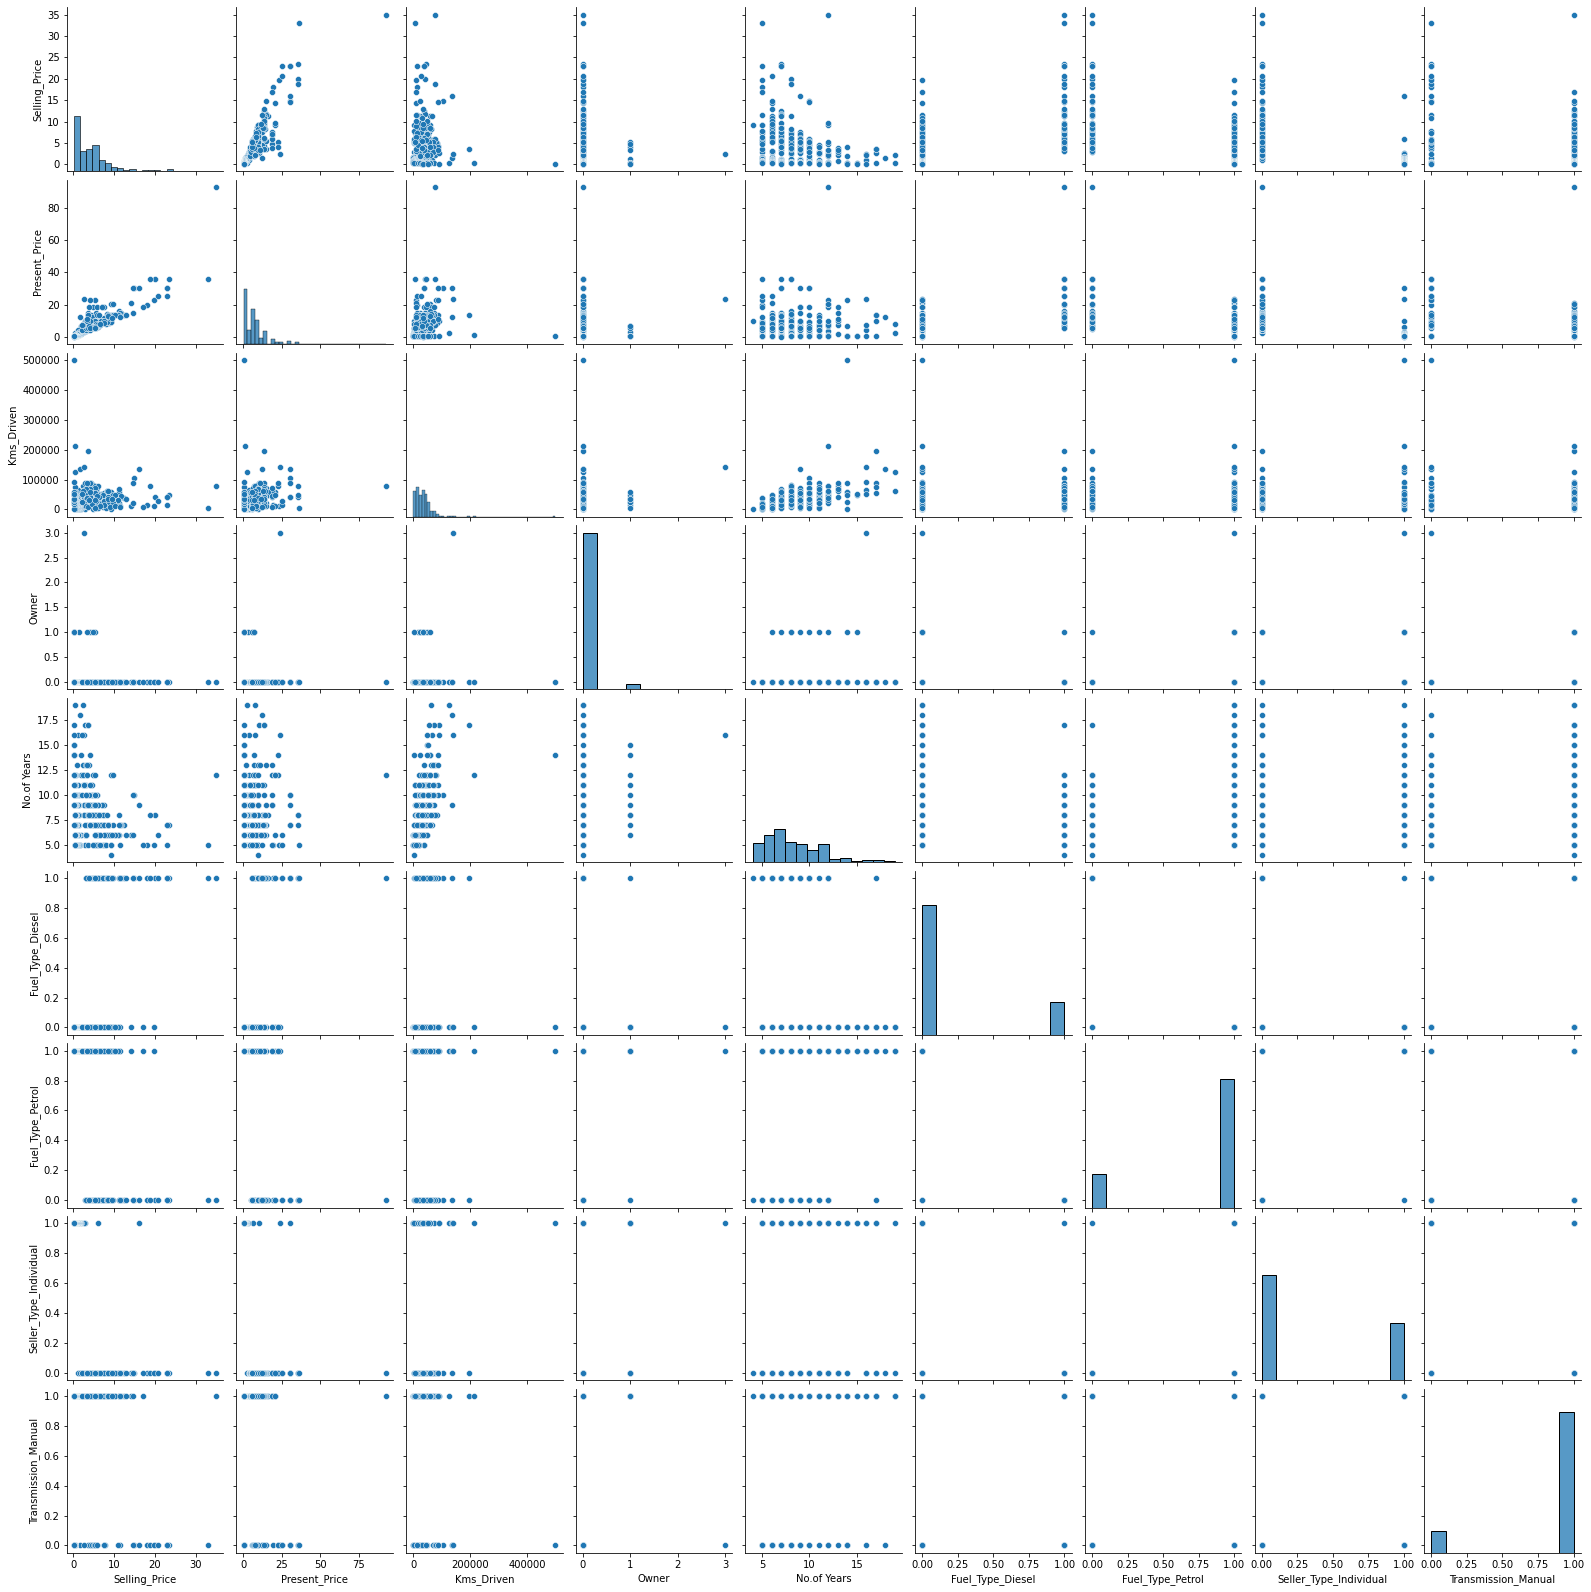

In [50]:
sns.pairplot(dataset)

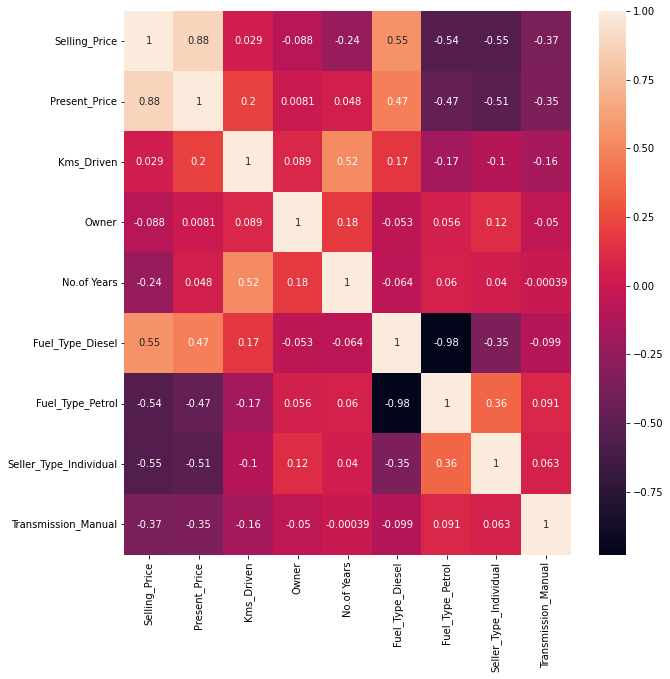

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
corr_mat= dataset.corr()
top_corelated_feat =corr_mat.index
plt.figure(figsize=(10,10))
h= sns.heatmap(dataset[top_corelated_feat].corr(), annot=True)

In [57]:
#Selecting Dependent and Independent features
X= dataset.iloc[:,1:]
Y=dataset.iloc[:,0]

In [58]:
X.head()

,Present_Price,Kms_Driven,Owner,No.of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [59]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [60]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor
ETR= ExtraTreesRegressor()
ETR.fit(X,Y)

ExtraTreesRegressor()

In [61]:
print(ETR.feature_importances_)

[3.78121694e-01 4.40315575e-02 3.60876511e-04 7.23298137e-02
 2.26429250e-01 1.82344111e-02 1.19291510e-01 1.41200886e-01]


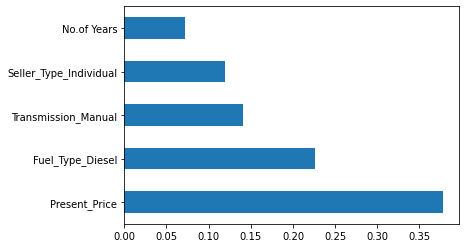

In [63]:
#plot graph of feature importance for better visualization
imp_feat= pd.Series(ETR.feature_importances_, index=X.columns)
imp_feat.nlargest(5).plot(kind= 'barh')
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3)

In [65]:
x_train.shape

(240, 8)

In [66]:
y_train.shape

(240,)

In [67]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()



In [79]:
# Hyperparameter selection/tuning

# No.of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 100, stop= 1200, num= 12)]
print(n_estimators)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [80]:
# Max No.of features at every split
max_features = ['auto', 'sqrt']

# Max no. of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# Min no. of samples needed for splitting at any node
min_samples_split = [2,5,10,15,100]

# Min no. of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


In [81]:
# Randomized Search CV to select the best values for the parameters

from sklearn.model_selection import RandomizedSearchCV

In [82]:
random_grid = { 'n_estimators': n_estimators, 'max_features': max_features, 
               'max_depth' : max_depth,'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [83]:
RCV = RandomizedSearchCV(estimator= RFR, param_distributions= random_grid, scoring= 'neg_mean_squared_error', 
                         n_iter= 10, cv=5, verbose=2, random_state= 42, n_jobs=1)

In [84]:
RCV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [85]:
predictions =  RCV.predict(x_test)

In [86]:
predictions

array([ 0.67895,  3.92116,  4.80277,  4.3465 ,  0.59008,  0.60609,
        0.43234,  3.67282,  8.89777,  1.0918 ,  4.05066,  8.13629,
        5.909  ,  0.67643,  9.69672,  0.76672,  8.05152,  6.3684 ,
        2.75385,  3.30204,  6.99981,  0.64875,  0.56   ,  6.2326 ,
        0.63332,  7.85104,  0.76449,  4.9348 , 11.12761,  8.70986,
        5.59196,  8.98934, 10.87793, 12.89557,  0.61296, 10.12457,
       20.4651 ,  3.59153,  6.45065,  0.2563 ,  3.423  ,  0.53469,
        8.87923,  0.46134,  0.96128,  4.36545,  2.23009,  0.75026,
        0.64043,  1.02897,  4.3699 ,  6.25028,  4.67102,  4.4015 ,
        3.0893 ,  4.1724 ,  0.55302,  3.66561,  0.61603,  5.66976,
        3.84894,  0.46176,  5.9287 ,  8.95613,  1.24119,  5.9287 ,
        5.1431 ,  5.0505 ,  0.26551,  4.0535 ,  3.87244,  0.55393,
       16.32027,  0.72776, 12.06097,  1.36781, 20.78455,  0.36784,
        2.52925,  4.25559,  2.82421, 11.10635,  0.80763,  3.24951,
        7.56091,  0.26541,  5.44351,  7.5754 ,  4.3216 ,  6.98

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


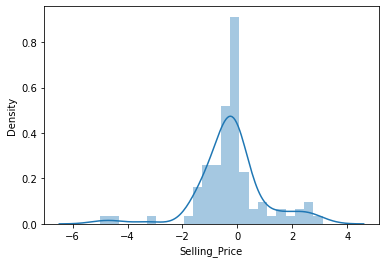

In [87]:
sns.distplot(y_test-predictions)

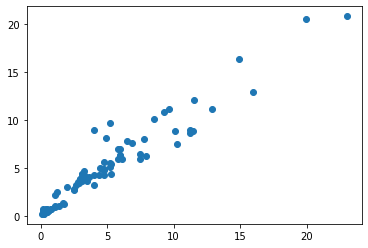

In [92]:
plt.scatter(y_test, predictions)

In [91]:
import pickle
# open a file where you want to store the data
file= open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(RCV, file) 

In [90]:
pip freeze > requirements.txt